In [1]:
# A Support Vector Machine (SVM) is capable of performing linear or nonlinear classification, regression, and even 
# outlier detection. SVMs are particularly well suited for classification of complex but smalll or medium-sized 
# datasets.

# Let's try it on iris dataset (Linear Classification). The following code loads the iris dataset, scales the 
# features, aand then trains a linear SVM model (using the LinearSVC class with C=0.1 and the hinge loss function).

import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica

svm_clf = Pipeline((
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=0.1, loss="hinge")),
    ))

svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [2]:
# As usual, you can use the model to make predictions
svm_clf.predict([[5.7, 1.7]])

# Unlike Logistic Regression it predicts classes.

array([1.])

Text(0, 0.5, 'x2')

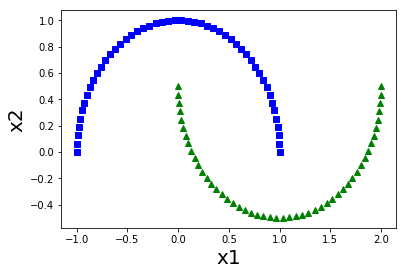

In [3]:
# In some cases many datasets are not even close to being linearly separable, as in this case:
from sklearn.datasets import make_moons 
# make_moons returns a simple toy dataset to visualise clustering and classification algorithms

import matplotlib.pyplot as plt

X, y = make_moons()
%matplotlib inline
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.xlabel("x1", fontsize=20)
plt.ylabel("x2", fontsize=20)

In [4]:
# Now to handle such datasets is to add more features, such as polynomial features.
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline((
            ("poly_features", PolynomialFeatures(degree=3)),
            ("scaler", StandardScaler()),
            ("svm_clf", LinearSVC(C=10, loss="hinge")),
))

polynomial_svm_clf.fit(X, y)

/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [5]:
# Using SVMs makes it possible to get the same result as if you added many polynomial features, even with very high
# degree polynomials, without actually having to add them. So there is no combinatorial explosion of the number of 
# features since you don't actually add any features. This trick is implemented using SVC class:

from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline((
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5)),
))
poly_kernel_svm_clf.fit(X, y)

# coef0 controls how much the model is influenced by high-degree polynomials versus low-degree polynomials.

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [6]:
# Another technique to tackle nonlinear problems is to add features using a similarity function that measures how
# much each instance resembles a particular landmark. There is a similarity function called Gaussian Radial Basis
# Function (RBF). It is a bell-shaped function varying from 0 (very far from the landmark) to 1 (at the landmark).
# Simplest approach is to create a landmark at location of each and every instance in the dataset. This creates 
# many dimensions and thus increases the chances that the transformed training set will be linearly separable.
# The downside is that a training set with m instances and n features gets transformed into a training set with m 
# instances and m features (assuming you dropped the original features.)

# It is computationally expensive to calculate all the additional features. Once again kernel does the trick:
# It makes it possile to obtain a similar result as if you had added many similarity features, without actually
# having to add them.

rbf_kernel_svm_clf = Pipeline((
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001)),
))

rbf_kernel_svm_clf.fit(X, y)

# The LinearSVC class is based on the liblinear library which doesn't support the kernel trick. It implements
# an optimmized algorithm called "A Dual Coordinate Method for Large-scale Linear SVM" for linear SVMs. It takes
# longer if you require a very high precision. Its training time complexity is roughly O(m X n).
# SVC class is based on the libsvm linrary which supports the kernel trick. It implements an optimized algorithm
# called "Sequential Minimal Optimization (SMO)". Its training time complexity is between O(m^2 X n) and O(m^3 X n)
# This algorithm is perfect for complex but small or medium sized datasets.

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [7]:
# As we mentioned earlier, the SVM algorithm is quite versatile: not only it does support linear and nonlinear
# classification, but it also supports linear and nonlinear regression. The trick is: instead of trying to fit
# the largest possible street between two classes while limiting margin violations, SVM Regression tries to fit as 
# many instances as possible on the streeet while limiting margin violations (i.e., instances off the street).
# The width of the street is controlled by a hyperparameter epsilon.

np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [8]:
from sklearn.svm import LinearSVR

svm_reg1 = LinearSVR(epsilon=1.5)
svm_reg2 = LinearSVR(epsilon=0.5)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=0.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

Text(0.5, 1.0, '$\\epsilon=0.5$')

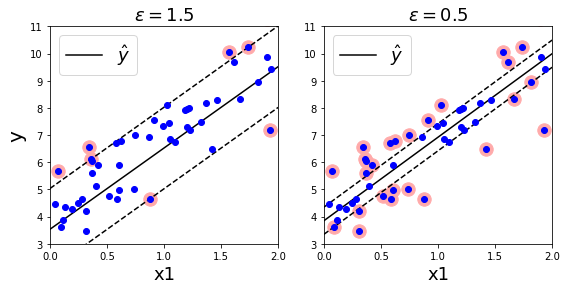

In [9]:
def find_support_vectors(svm_reg, X , y):
    y_pred = svm_reg.predict(X)
    off_margin = np.abs(y - y_pred) >= svm_reg.epsilon
    return np.argwhere(off_margin) # returns index where off_margin is true

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.plot(X, y, "bo")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA') # support vectors
    plt.xlabel("x1", fontsize=18, rotation=0)
    plt.axis(axes)
    plt.legend(loc="upper left", fontsize=18)
    
plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.ylabel("y", fontsize=20)
plt.title(r"$\epsilon={}$".format(svm_reg1.epsilon), fontsize=18)
plt.subplot(122)
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon={}$".format(svm_reg2.epsilon), fontsize=18)

In [10]:
# To tackle nonlinear regression tasks, you can use a kernelized SVM model. The SVR class is regression equivalent
# of the SVC class, and the LinearSVR class is the regression equivalent of the LinearSVC class.

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1,
  gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
# Let's train two models and spot the difference by changing the value of hyperparameter C. 
svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="auto")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="auto")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Text(0.5, 1.0, '$degree=2, C=0.01, \\epsilon=0.1$')

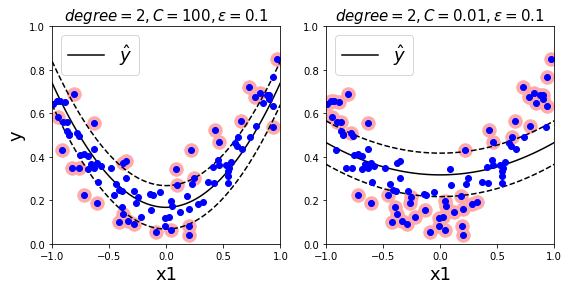

In [12]:
# There is a little regularization on the left plot (i.e., a large C value), and much more regularization on the 
# right plot (i.e., a small C value)

plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.ylabel("y", fontsize=18)
plt.title(r"$degree={}, C={}, \epsilon={}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), 
          fontsize=15)
plt.subplot(122)
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon={}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), 
          fontsize=15)